In [1]:
from sklearn.cluster import KMeans;import matplotlib.pyplot as plt; import pandas as pd

In [3]:
df = pd.read_csv('../data/geohash_address_available_hourly_data.csv') #the dataframe contains traffic density point address, coordinates, amount of data available
df = df.loc[df['data_amount']>28000]# choose only the points with over 28k data
print(df.shape)
print(df.info())

(1817, 43)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1817 entries, 0 to 2286
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GEOHASH         1817 non-null   object 
 1   LATITUDE        1817 non-null   float64
 2   LONGITUDE       1817 non-null   float64
 3   ISO3166-2-lvl4  1817 non-null   object 
 4   aeroway         7 non-null      object 
 5   amenity         152 non-null    object 
 6   building        66 non-null     object 
 7   city            33 non-null     object 
 8   city_district   115 non-null    object 
 9   club            1 non-null      object 
 10  commercial      10 non-null     object 
 11  country         1817 non-null   object 
 12  country_code    1817 non-null   object 
 13  county          11 non-null     object 
 14  craft           1 non-null      object 
 15  district        46 non-null     object 
 16  farm            7 non-null      object 
 17  healthcare      1 non-

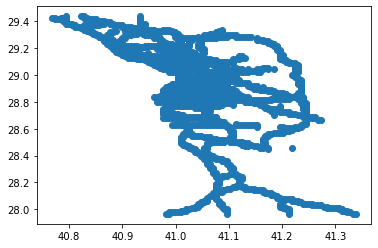

In [4]:
x = df['LATITUDE']
y = df['LONGITUDE']

plt.scatter(x, y)
plt.show() 

Determine the optimum k value using the elbow method

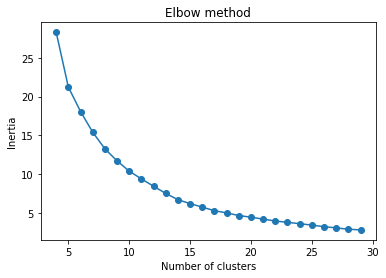

In [10]:


data = list(zip(x, y))
inertias = []
k_upper_limit = 30
for i in range(4,k_upper_limit):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(4,k_upper_limit), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

The elbow method shows that 10 may be a good value for K, so we retrain and visualize the result.
**Note**: Others may also prefer another value. The elbow method, as you can see, is an approximate method whose observations differ from person to person.

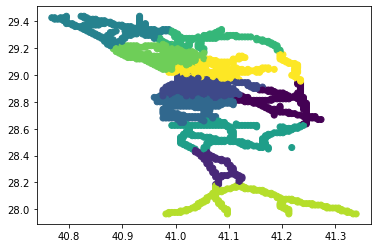

In [11]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show() 

Let's add the labels and the centroid values to the geohash dataframe and save it 

In [13]:
(kmeans.labels_)

array([3, 7, 7, ..., 7, 8, 8], dtype=int32)

In [14]:
kmeans.cluster_centers_

array([[41.20292048, 28.79167773],
       [41.07979947, 28.31635768],
       [41.05069418, 28.90425463],
       [41.0283681 , 28.76413728],
       [40.88849161, 29.3365549 ],
       [41.09941469, 28.55883   ],
       [41.06165561, 29.25903324],
       [40.97263555, 29.14163771],
       [41.14688599, 28.05963564],
       [41.09481198, 29.04187015]])

In [15]:
df['label'] = kmeans.labels_

In [16]:
df.head(4)

,GEOHASH,LATITUDE,LONGITUDE,ISO3166-2-lvl4,aeroway,amenity,building,city,city_district,club,...,region,residential,road,shop,suburb,tourism,town,village,data_amount,label
0,sxk3xw,41.080627,28.811646,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Marmara Bölgesi,NaN,Yaşar Doğu Bulvarı,NaN,İkitelli OSB Mahallesi,NaN,Başakşehir,NaN,28504,3
1,sxk9nm,40.987244,29.108276,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Marmara Bölgesi,NaN,Küçükbakkalköy Bağlantısı,NaN,Atatürk Mahallesi,NaN,Ataşehir,NaN,28504,7
2,sxk9q0,41.003723,29.097290,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Marmara Bölgesi,NaN,3100. Sokak,NaN,Mustafa Kemal Mahallesi,NaN,Ataşehir,NaN,28492,7
3,sxk3hx,40.998230,28.679810,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Marmara Bölgesi,NaN,NaN,NaN,Yakuplu Mahallesi,NaN,Beylikdüzü,NaN,28496,3


In [21]:
centroid_lat = [kmeans.cluster_centers_[i][0] for i in kmeans.labels_]
centroid_lon = [kmeans.cluster_centers_[i][1] for i in kmeans.labels_]

In [23]:
df['centroid_lat'] = centroid_lat
df['centroid_lon'] = centroid_lon

In [24]:
df.head(5)

,GEOHASH,LATITUDE,LONGITUDE,ISO3166-2-lvl4,aeroway,amenity,building,city,city_district,club,...,road,shop,suburb,tourism,town,village,data_amount,label,centroid_lat,centroid_lon
0,sxk3xw,41.080627,28.811646,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Yaşar Doğu Bulvarı,NaN,İkitelli OSB Mahallesi,NaN,Başakşehir,NaN,28504,3,41.028368,28.764137
1,sxk9nm,40.987244,29.108276,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Küçükbakkalköy Bağlantısı,NaN,Atatürk Mahallesi,NaN,Ataşehir,NaN,28504,7,40.972636,29.141638
2,sxk9q0,41.003723,29.097290,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,3100. Sokak,NaN,Mustafa Kemal Mahallesi,NaN,Ataşehir,NaN,28492,7,40.972636,29.141638
3,sxk3hx,40.998230,28.679810,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Yakuplu Mahallesi,NaN,Beylikdüzü,NaN,28496,3,41.028368,28.764137
4,sx7cmx,41.042175,28.020630,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Dertli Sokak,NaN,Gümüşyaka Mahallesi,NaN,Silivri,NaN,28297,8,41.146886,28.059636


In [25]:
df.to_csv('geohash_traffic_density_pt_clustered.csv', index=False)